# Ford GoBike System Data
## by Omar Magdi

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline

In [2]:
file = '201902-fordgobike-tripdata.csv'
df = pd.read_csv(file)

In [3]:
df.shape

(183412, 16)

In [4]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# Checking for Null entries
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# Droping Null entries
df = df.drop(df[df['member_gender'].isnull() == True].index)

In [9]:
df.shape, df.isnull().sum()

((175147, 16),
 duration_sec                 0
 start_time                   0
 end_time                     0
 start_station_id           195
 start_station_name         195
 start_station_latitude       0
 start_station_longitude      0
 end_station_id             195
 end_station_name           195
 end_station_latitude         0
 end_station_longitude        0
 bike_id                      0
 user_type                    0
 member_birth_year            0
 member_gender                0
 bike_share_for_all_trip      0
 dtype: int64)

In [10]:
# Droping Null entries
df = df.drop(df[df['start_station_id'].isnull() == True].index)

In [11]:
df.shape, df.isnull().sum()

((174952, 16),
 duration_sec               0
 start_time                 0
 end_time                   0
 start_station_id           0
 start_station_name         0
 start_station_latitude     0
 start_station_longitude    0
 end_station_id             0
 end_station_name           0
 end_station_latitude       0
 end_station_longitude      0
 bike_id                    0
 user_type                  0
 member_birth_year          0
 member_gender              0
 bike_share_for_all_trip    0
 dtype: int64)

In [12]:
# Duration of the experiment
d1, d2 = int(df.start_time.max().split(' ')[0].split('-')[2]), int(df.start_time.min().split(' ')[0].split('-')[2])
print('{} days running the experiment.'.format(d1 - d2))

27 days running the experiment.


In [13]:
birth_range = df.member_birth_year.max() - df.member_birth_year.min()
print(int(df.member_birth_year.min()), 'till', int(df.member_birth_year.max()), ",", int(birth_range), "years")

1878 till 2001 , 123 years


In [14]:
df[df['member_birth_year'] < 1950].member_birth_year.value_counts()

1947.0    135
1945.0    105
1949.0     99
1931.0     89
1900.0     53
1948.0     51
1943.0     30
1942.0     21
1933.0     20
1946.0     19
1939.0     11
1902.0     11
1941.0      9
1901.0      6
1938.0      3
1920.0      3
1934.0      2
1944.0      2
1927.0      1
1930.0      1
1910.0      1
1928.0      1
1878.0      1
Name: member_birth_year, dtype: int64

In [15]:
df[df['member_birth_year'] < 1930].member_birth_year.value_counts().sum()

77

In [16]:
# Droping entries with age less than 1930
df = df.drop(df[df['member_birth_year'] < 1930].index)

In [17]:
df.shape[0]

174875

In [18]:
df.bike_id.nunique()

4607

In [19]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [20]:
# change duration from seconds to minutes 
df['duration_sec'] = df['duration_sec']/60

In [21]:
df.rename(columns={"duration_sec": "duration_min"}, inplace = True)

In [22]:
# extract 
df_compact = df.drop(['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude'], axis=1)

In [23]:
df_compact.head()

,duration_min,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,869.750000,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No
2,1030.900000,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No
3,608.166667,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No
4,26.416667,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes
5,29.883333,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No


In [24]:
# Number of stations
df_compact.start_station_name.nunique()

329

In [25]:
# Extracting weekday frome date
import time
import calendar

df_compact['start_time'] = pd.to_datetime(df['start_time'])
df_compact['start_day'] = df_compact['start_time'].dt.weekday
df_compact.start_day.replace({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}, inplace = True)
df_compact['end_time'] = pd.to_datetime(df['end_time'])
df_compact['end_day'] = df_compact['end_time'].dt.weekday
df_compact.end_day.replace({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}, inplace = True)

In [26]:
# Changing entries from string to boolean 
df_compact.rename(columns={"member_birth_year": "yob", "user_type": "subscriber", "member_gender": "gender"}, inplace = True)
df_compact.subscriber.replace({'Customer': 0, 'Subscriber': 1}, inplace = True)
df_compact.bike_share_for_all_trip.replace({'No': 0, 'Yes': 1}, inplace = True)

In [27]:
df_compact.rename(columns={"bike_share_for_all_trip": "bike_share"}, inplace = True)

In [28]:
# Changing entries from floats to integers 
df_compact = df_compact.astype({'duration_min': 'int64', 'yob': 'int64'})

In [29]:
df_compact.head()

,duration_min,start_time,end_time,start_station_name,end_station_name,bike_id,subscriber,yob,gender,bike_share,start_day,end_day
0,869,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,0,1984,Male,0,Thu,Fri
2,1030,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,0,1972,Male,0,Thu,Fri
3,608,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,1,1989,Other,0,Thu,Fri
4,26,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,1,1974,Male,1,Thu,Fri
5,29,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,1,1959,Male,0,Thu,Fri


### What is the structure of your dataset?

<ul>
  <li>Timeline of DataSet: 28 days</li>
  <li>Dataset consists of 174875 records </li>
  <li>Number of Bikes: 4607 </li>
  <li>Number of Stations: 329 </li>
</ul>  
 
### What is/are the main feature(s) of interest in your dataset?


<ul>
  <li>Duration</li>
  <li>Gender</li>
  <li>Subscribtion</li>
  <li>Day of Week</li>
</ul>  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Day of week / subscription

## Univariate Exploration

In [30]:
preset_color = sb.color_palette("Set2")[0]
def x_ax(Dataframe, x):
    
    # Ordering variable by descending order
    order = Dataframe[x].value_counts().index
    
    # Returns a count plot
    return sb.countplot(data = Dataframe, x = x , order = order, color = sb.color_palette("Set2")[0]);

<h4> How many of the bikers are Male? how many are Females?</h4><h4> What is the proportion of subscribers to customers?</h4>

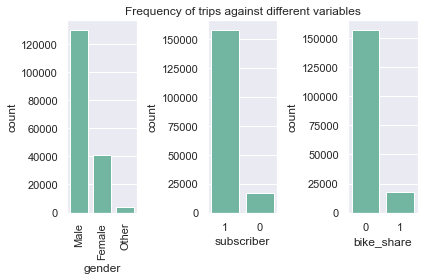

In [115]:
# frequency of trips against different variables.
fig, axs = plt.subplots()

plt.subplot(1, 3, 1)
plt.xticks(rotation = 90)
x_ax(df_compact, 'gender')

plt.subplot(1, 3, 2)
plt.title('Frequency of trips against different variables')
x_ax(df_compact, 'subscriber')

plt.subplot(1, 3, 3)
x_ax(df_compact, 'bike_share')

fig.tight_layout();

>According to this graph it is concluded that male bikers outnumber female bikers by 3 times.
    Most of the trips taken are by subscribers. Only few are by customers.

<h4> What age are bikers most active?</h4>

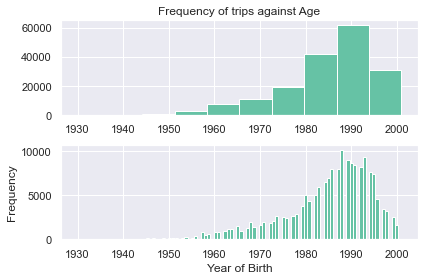

In [116]:
# frequency of trips against Age.

fig, axs = plt.subplots()

plt.subplot(2, 1, 1)
# Hist Plot
plt.title('Frequency of trips against Age')
plt.hist(df_compact.yob, bins = 10, color = preset_color)

plt.subplot(2, 1, 2)
# Hist Plot
plt.hist(df_compact.yob, bins = 100, color = preset_color)

# Defining parameters
plt.xlabel("Year of Birth")
plt.ylabel('Frequency');
fig.tight_layout();

>Highest frequency of trips ranges from teenagers to mid 30's individuals.

<h4> What day are bikers most active?</h4>

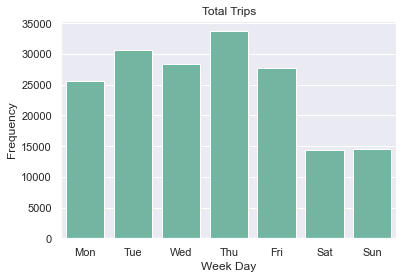

In [110]:
# frequency of trips against weekdays.
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.countplot(data = df_compact, x = 'start_day', color = preset_color, order = weekdays);

# Defining parameters
plt.title('Total Trips')
plt.xlabel('Week Day')
plt.ylabel('Frequency');
fig.tight_layout();

>Bikers are least active on weekends, the graph shows more activity on workdays, with Thursday holding the highest frequency of trips.

In [34]:
# Getting frequency of trips for each day in the month
counter = []
counter_list = []

# listing values of start_time column into a list as a string in "counter" list
for i in df_compact['start_time'].values.astype('str'):
    counter.append(i)
    
# stripping the day number from the string listed in "counter" and appending it to "counter_list"
for i in range(len(df_compact)):
    counter_list.append(counter[i].split('T')[0].split('-')[2])

# 1. creating an array of day number of the month from "counter_list"
# 2. creating a dataframe using the array created
days_count = pd.DataFrame(np.array(counter_list).astype('int64'))
days_count = days_count.rename(columns = {0: 'day'})

tup = []
for i in days_count.day:
    tup.append(i)

# using counter funtion from collections module to count the frequency for each day number of the month
from collections import Counter
counter = Counter(tup)

# sorting in ascending order
val = []
for i in counter.values():
    val.append(i)
val.reverse()
val = np.array(val)

# sorting in ascending order
day = []
for i in counter.keys():
    day.append(i)
day.reverse()

day = np.array(day)
df_day = pd.DataFrame({'Val':val, 'Day':day})

<h4> Are there days more active than others within the month of February?</h4>

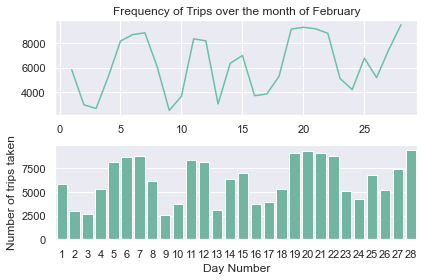

In [108]:
fig, axs = plt.subplots()

plt.subplot(2, 1, 1)
# Line Plot
sb.lineplot(x= day, y= val, color = preset_color);
plt.title('Frequency of Trips over the month of February')

plt.subplot(2, 1, 2)
# Bar Plot
sb.barplot(data = df_day, x = day, y = val, color = preset_color);

# Defining parameters
plt.xlabel('Day Number')
plt.ylabel('Number of trips taken');
fig.tight_layout();

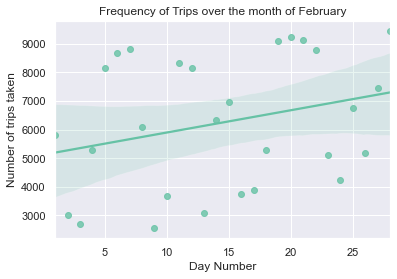

In [104]:
# Reg Plot
sb.regplot(data = df_compact, x = day, y = val, color = preset_color);

# Defining parameters
plt.title('Frequency of Trips over the month of February')
plt.xlabel('Day Number')
plt.ylabel('Number of trips taken');

>It shows a slight increase in the average durations of trips from the beginning of the month of February till its end.
    Could a change in weather have an effect on the frequency or duration of trips?

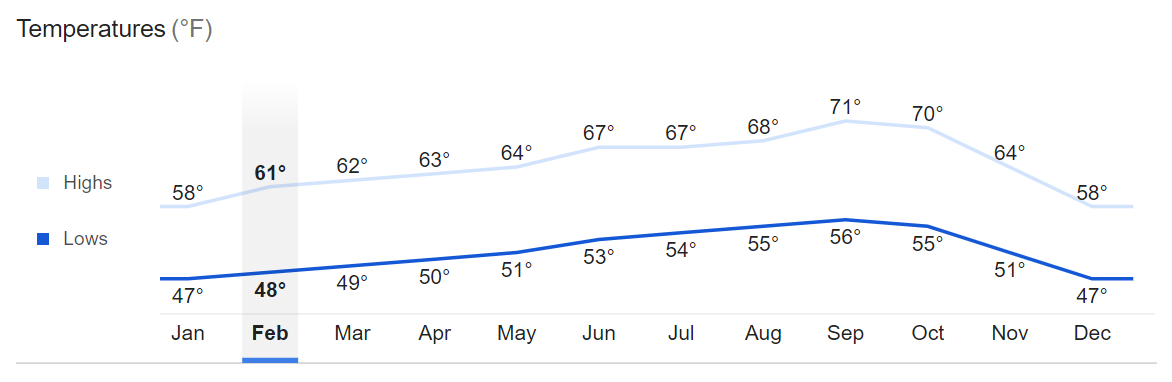

In [37]:
from IPython.display import Image
Image("external-source/Temp.png")

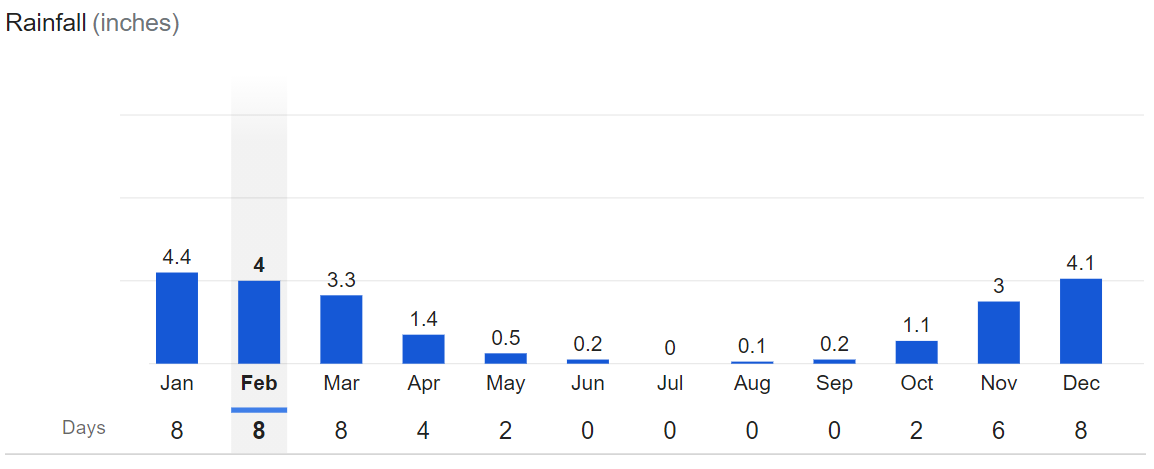

In [38]:
Image("external-source/Rainfall.png")

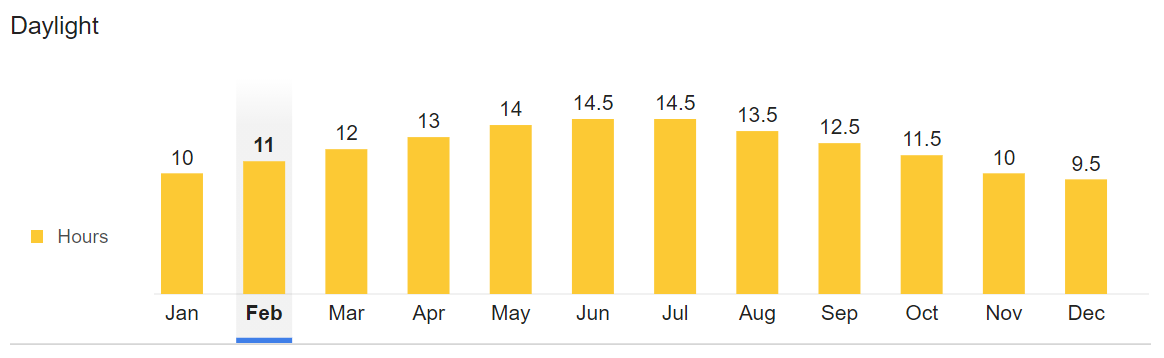

In [39]:
Image("external-source/Daylight.png")

>There is no significant change in the weather in Feb to Mar that could have lead to the increase in the average trip duration.
>>In this case; we fail to reject the null, that our sample did not provide sufficient evidence to conclude that the 
    effect exists

<h4> What is the mean duration of trips?</h4>

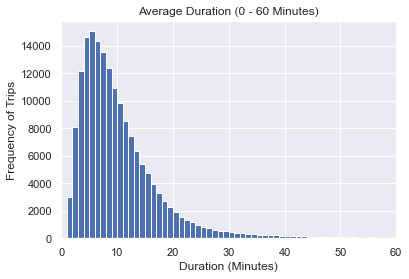

In [40]:
# frequency of trips against Average Duration.

bin_edges = np.arange(0, df_compact['duration_min'].max(), 1)
plt.hist(data = df_compact , x = 'duration_min', bins = bin_edges)
# setting the display range of x-axis, duration, from 0 to 60 minutes
plt.xlim(0,60);
plt.xlabel('Duration (Minutes)');
plt.title('Average Duration (0 - 60 Minutes)');
plt.ylabel('Frequency of Trips');

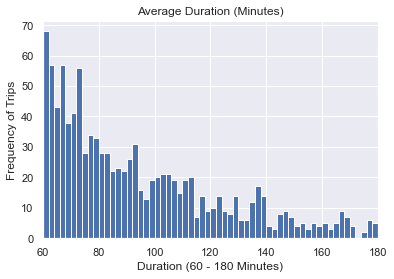

In [41]:
bin_edges = np.arange(60, df_compact['duration_min'].max(), 2)
plt.hist(data = df_compact , x = 'duration_min', bins = bin_edges)
# setting the display range of x-axis, duration, from 60 to 180 minutes
plt.xlim(60,180);
# Defining parameters
plt.xlabel('Duration (60 - 180 Minutes)');
plt.title('Average Duration (Minutes)');
plt.ylabel('Frequency of Trips');

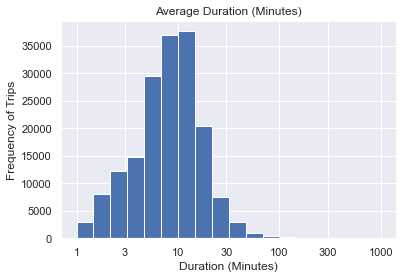

In [42]:
# Applying transformation
bins = 10**np.arange(0 , 3 + 1/6 , 1/6)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
# apply labels to x-axis using user defined ticks.
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_compact , x = 'duration_min' , bins = bins);
# setting the display of x-axis, duration, to a log scale.
plt.xscale('log');
# Defining parameters
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Duration (Minutes)');
plt.ylabel('Frequency of Trips');

>The mean duration of a Trip is 11 minutes

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Massive skew to the right. The plot had to be transformed to a log-scale.


## Bivariate Exploration

> In this section we investigate relationships between pairs of variables in the
data. 

In [45]:
def x_ax2(Dataframe, x, hue):
    order = Dataframe[x].value_counts().index
    return sb.countplot(data = Dataframe, x = x , order = order, hue = hue);

<h4> What is the proportion of subscribers among genders?</h4>

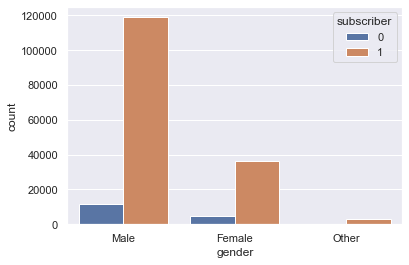

In [46]:
x_ax2(df_compact, 'gender', 'subscriber');

<h4> What is the proportion of bike share among genders?</h4>

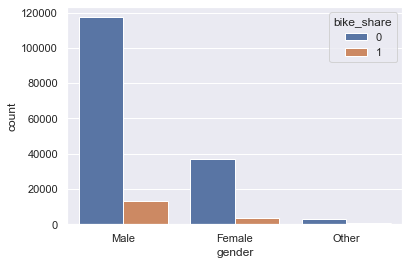

In [47]:
x_ax2(df_compact, 'gender', 'bike_share');

<h4> Does gender affect the frequency of trips along weekdays?</h4>

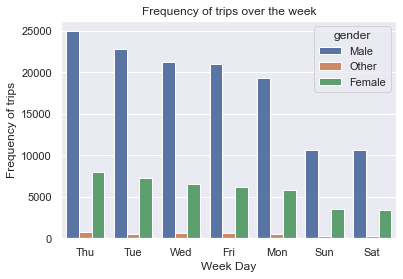

In [95]:
# Count Plot
x_ax2(df_compact, 'start_day', 'gender');

# Defining parameters
plt.title('Frequency of trips over the week');
plt.xlabel('Week Day');
plt.ylabel('Frequency of trips');

>There is no significance.

<h4> What is the mean duration of trips taken by subscribers and customers over the week?</h4>

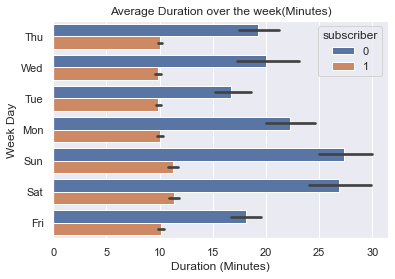

In [97]:
# Bar Plot
bins = 10**np.arange(2 , 3 + 1/6 , 1/6)
ticks =  [0, 5, 10, 15, 20, 25, 30]
labels = ['{}'.format(v) for v in ticks]
sb.barplot(x="duration_min", y="start_day", hue="subscriber", data=df_compact);

# Defining parameters
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('Average Duration over the week(Minutes)');
plt.ylabel('Week Day');

<h4> Supporting the previous plot with a frequency to duration distribution for better understanding</h4>

<ipython-input-98-f530f6da8e3e>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0,120)


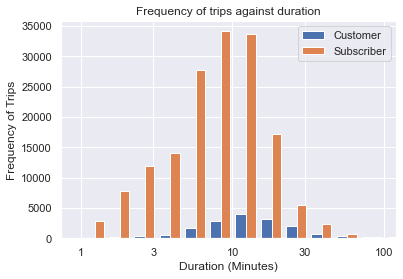

In [98]:
# Creating seperate dataframes from subscribers and customers
subscriber = df_compact[df_compact['subscriber'] == 1].duration_min
customer = df_compact[df_compact['subscriber'] == 0].duration_min

# Hist Plot
bins = 10**np.arange(0 , 3 + 1/6 , 1/6)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist([customer, subscriber], bins = bins, label=['Customer', 'Subscriber']);
plt.xscale('log');
plt.xticks(ticks,labels);

# Defining parameters
plt.title('Frequency of trips against duration');
plt.xlabel('Duration (Minutes)');
plt.ylabel('Frequency of Trips');
plt.xlim(0,120)
plt.legend();

In [52]:
# total count of trips made by subcribers, mean duration of total trips by subscribers
s_count, s_mean = df_compact[df_compact['subscriber'] == 1].duration_min.count(), df_compact[df_compact['subscriber'] == 1].duration_min.mean()

In [53]:
# total count of trips made by customers, mean duration of total trips by customers
c_count, c_mean = df_compact[df_compact['subscriber'] == 0].duration_min.count(), df_compact[df_compact['subscriber'] == 0].duration_min.mean()

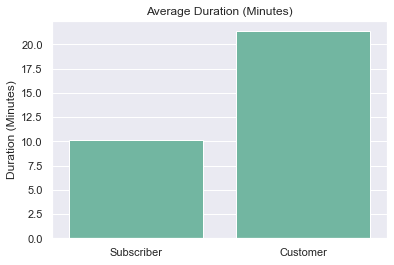

In [102]:
# Bar Plot
sb.barplot(data = df_compact, x = ['Subscriber', 'Customer'], y = [s_mean, c_mean], color = preset_color)

# Defining parameters
plt.title('Average Duration (Minutes)')
plt.ylabel('Duration (Minutes)');

   >Subscribers take half the duration to complete a trip than a regular customer,
    but why?

In [55]:
df_temp = df_compact.query("start_station_name == 'Market St at 10th St' and end_station_name == 'Montgomery St BART Station (Market St at 2nd St)'")

In [56]:
df_temp[df_temp['subscriber'] == 1].duration_min.mean()

8.71889400921659

In [57]:
df_temp[df_temp['subscriber'] == 0].duration_min.mean()

10.461538461538462

>Uniting the same route that customers and subscribers take, the average duration for a specefic route from "Market St at 10th St" to "Montgomery St BART Station (Market St at 2nd St)" takes a subscriber less time than a regular customer.

## Multivariate Exploration

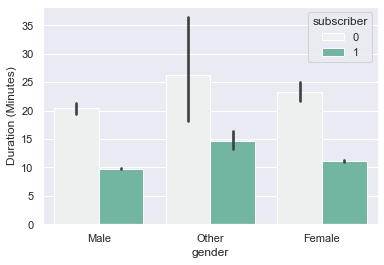

In [58]:
sb.barplot(data = df_compact, x = 'gender', y = 'duration_min', color = preset_color, hue = 'subscriber')

plt.ylabel('Duration (Minutes)');

    Nothing significant.

In [89]:
def scatter_plot(DataFrame, x, y, hue, xlabel, ylabel):
    
    fig, axs = plt.subplots()

    plt.subplot(2, 1, 1)
    sb.scatterplot(x=x, y=y, hue=hue, data = DataFrame, alpha = 0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.subplot(2, 1, 2)
    sb.scatterplot(x=x, y=y, hue=hue, data = DataFrame, alpha = 0.5)
    plt.yscale('log');
    ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
    labels = ['{}'.format(v) for v in ticks]
    plt.yticks(ticks,labels)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    fig.tight_layout();

<h4>Keeping 2 constant variables and a changing variable to search for trends</h4>

<ipython-input-87-2b95c11da98a>:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout();
C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


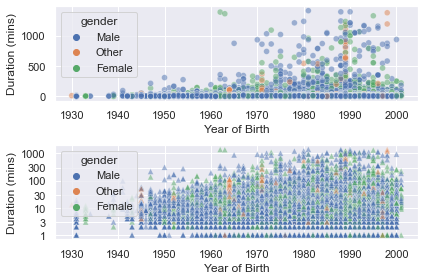

In [88]:
scatter_plot(df_compact, "yob", "duration_min", "gender", 'Year of Birth', "Duration (mins)")

>Nothing significant.

<ipython-input-71-a6bbef71b7e1>:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout();
C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


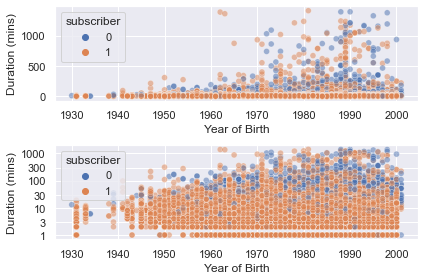

In [72]:
scatter_plot(df_compact, "yob", "duration_min", "subscriber", 'Year of Birth', "Duration (mins)")

>No trends noticed.

<ipython-input-71-a6bbef71b7e1>:19: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout();
C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


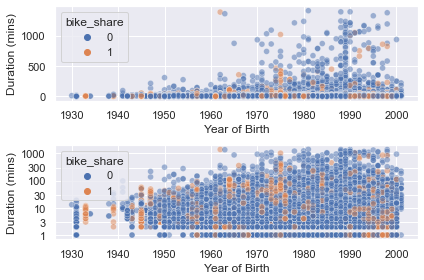

In [73]:
scatter_plot(df_compact, "yob", "duration_min", "bike_share", 'Year of Birth', "Duration (mins)")

>A trend is noticed between the 1970's and 1980's with a rise in bike-share relatively to other years.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Rentals on workdays are booming, I believe it is used as a mean of transportation across San Francisco.
No significant effect caused by gender. Age contributes strongly to the frequency of trips taken, with highest frequency by teenagers to mid 30's


### Were there any interesting or surprising interactions between features?

> Subscribers take less time in a trip than a regular customer, however looking at the frequency of trips taken by subscribers to customer contradicts my surprise.


In [60]:
df_compact.to_csv('df_compact.csv')